# Lead Scoring Case Study

#### Study Group:
- Harsh Patel</br>
- Nikhil Jindal</br>
- Vaibbhav Nadkarnni
<hr>

## Problem Statement
An education company named X Education needs help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals and Objectives
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score

In [2]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Update settings to display all columns of the dataset
pd.options.display.max_columns = None

## Step 1: Importing Data

In [4]:
leads_df = pd.read_csv('Leads.csv')
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Step 2: Inspecting the Dataframe

In [5]:
leads_df.shape

(9240, 37)

In [6]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Check the data type of each variable and look for variables with null values

In [7]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Step 3: Data Preparation

In [8]:
print(leads_df['Prospect ID'].duplicated().sum())
print(leads_df['Lead Number'].duplicated().sum())

0
0


#### Note : `Prospect ID` and `Lead Number` have unique set of values which are not important for our analysis. We can choose to drop these columns

In [9]:
cols_to_drop = ['Prospect ID', 'Lead Number']
leads_df = leads_df.drop(cols_to_drop, axis=1)
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Check the percentage of null values in each column

In [10]:
round(100 * leads_df.isnull().sum()/len(leads_df), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

#### We can see that there are many columns with NULL values.

#### Treatment of "Select" value in entire dataset
Some columns have values as "Select". These could be the blank fields wherein the respondent chose not to mention the details. We can treat these values as NULL and replace "Select" with "NaN"

In [11]:
leads_df = leads_df.replace('Select', np.nan)
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Recalculate the null value percentage

In [12]:
round(100 * leads_df.isnull().sum()/len(leads_df), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

We see a significant rise in the NULL value percentage for below variables:
- `Specialization`
- `How did you hear about X Education`
- `Lead Profile`
- `City` <br>


#### Let us drop columns where NULL percentage is above 40%

In [13]:
cols_to_drop = ['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index',
                'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']

leads_df = leads_df.drop(cols_to_drop, axis=1)
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


#### Checking if there are variables with only one unique value because those variables won't provide any valuable insight in our analysis

In [14]:
leads_df.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

#### Following columns have only 1 unique value. These columns will not have any impact on our analysis and hence we can choose to drop them:
- `Magazine`
- `Receive More Updates About Our Courses`
- `Update me on Supply Chain Content`
- `Get updates on DM Content`
- `I agree to pay the amount through cheque` 

In [15]:
cols_to_drop = ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
                'Get updates on DM Content', 'I agree to pay the amount through cheque']
leads_df = leads_df.drop(cols_to_drop, axis=1)
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,NaN,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


### Univariate Analysis for Categorical variables

### Country

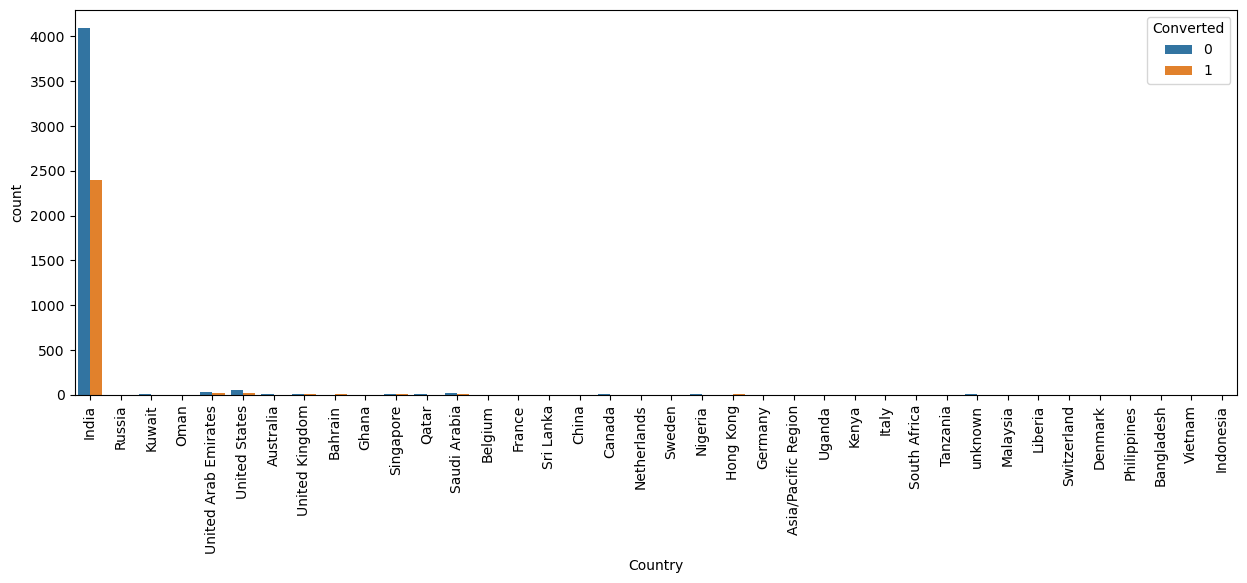

In [16]:
#plotting spread of Country columnn
plt.figure(figsize=(15,5))
s1 = sns.countplot(x=leads_df.Country, hue=leads_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

#### As we can see the number of values for are quite high only for India and negligible for other countries. This column can be dropped

In [17]:
leads_df.drop('Country', axis=1, inplace=True)

### City

In [18]:
leads_df['City'].value_counts(dropna=False)

City
NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

####  Since the count of values for NaN is quite significant, it would not be apt to replace these with Mode value "Mumbai". Let us update NaN with `Not Specified`

In [19]:
leads_df.City.fillna('Not Specified', inplace=True)
leads_df['City'].value_counts(dropna=False)

City
Not Specified                  3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

#### Plotting spread of the feature after replacing NaN values

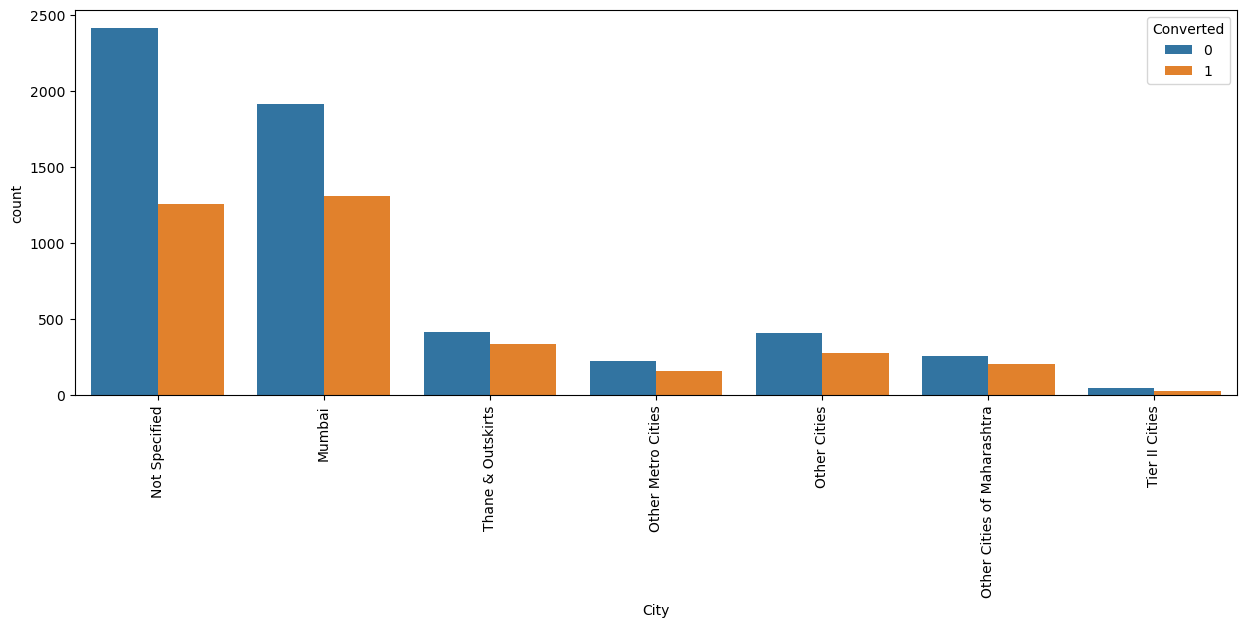

In [20]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads_df.City, hue=leads_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

####  Insights
Majority of the leads have not selected their City, however almost half of them have converted into paying customers.

### Specialization
Checking value counts

In [21]:
leads_df['Specialization'].value_counts(dropna=False)

Specialization
NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

#### Replace the NULL values with "Not Specified"

In [22]:
leads_df['Specialization'] = leads_df['Specialization'].replace(np.nan, 'Not Specified')

#### Plotting spread of the feature

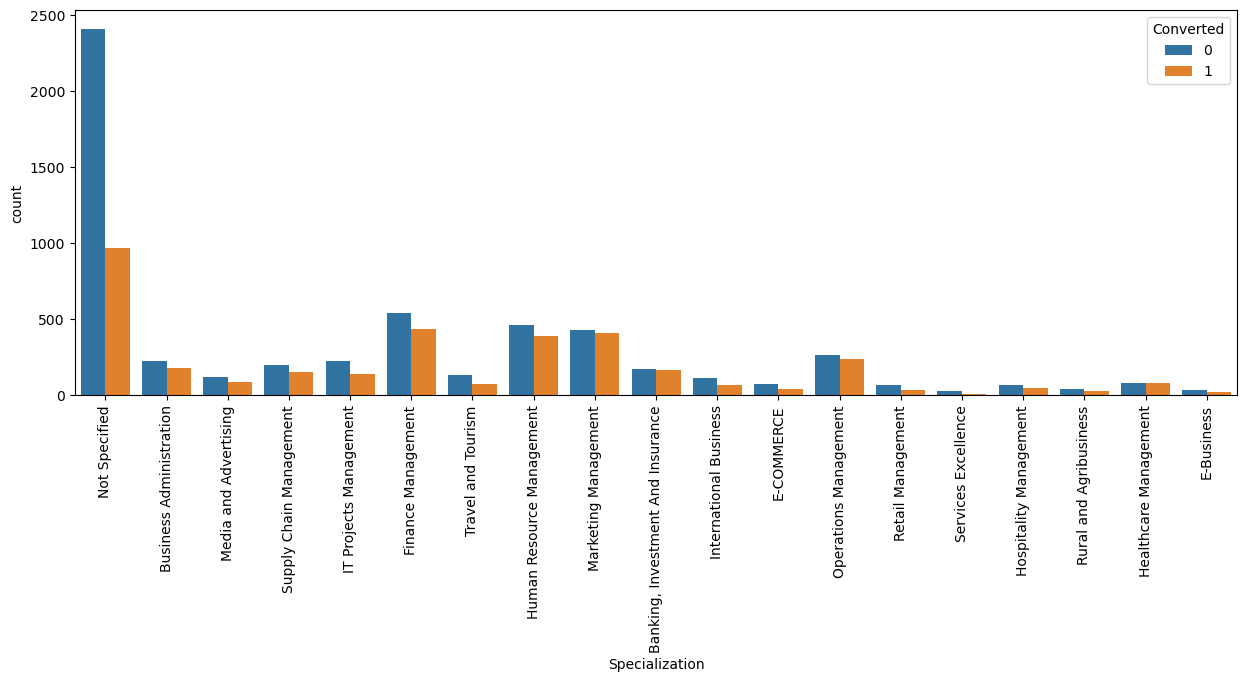

In [23]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads_df.Specialization, hue=leads_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

####  Insights
- We see that specialization with Management in them have higher number of leads and convertion rate is also good. So this is definitely a significant variable and should not be dropped.
- Also let us merge all Management specialization into one value

#### Combining Management Specializations because they show similar trends

In [24]:
leads_df['Specialization'] = leads_df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                                 'Marketing Management','Operations Management',
                                                                 'IT Projects Management','Supply Chain Management',
                                                                 'Healthcare Management','Hospitality Management',
                                                                 'Retail Management'] ,
                                                                'Management Specializations')

#### Re-plotting spread of the feature

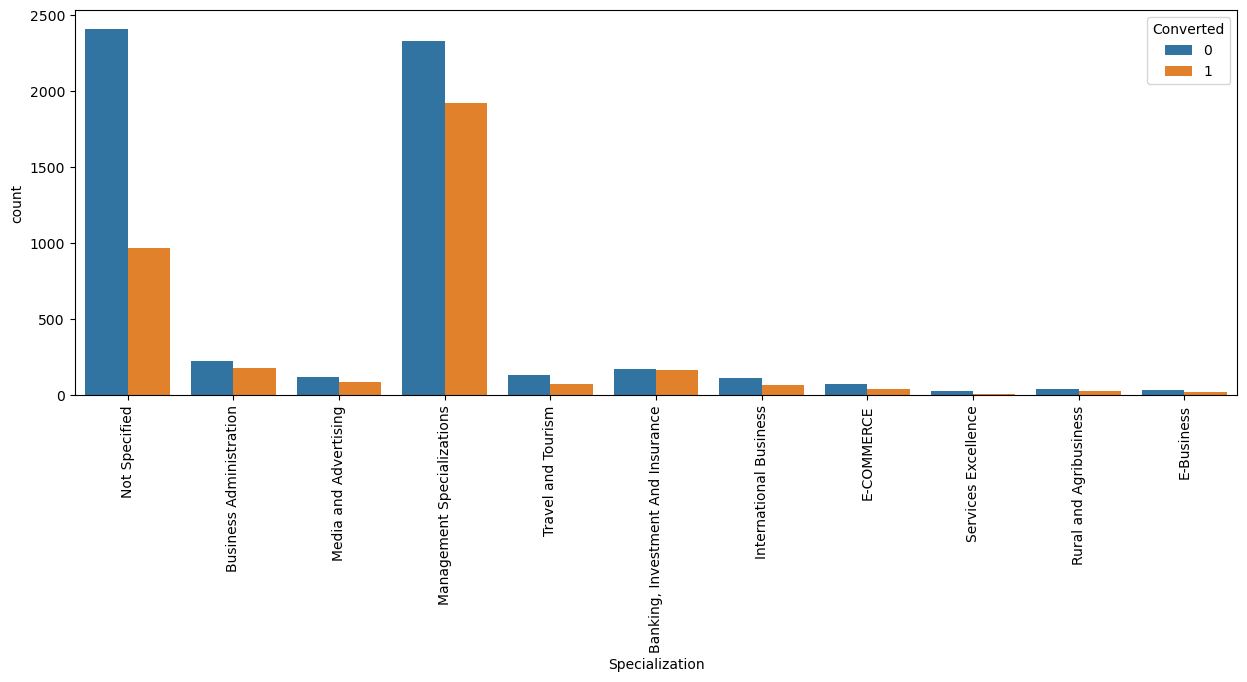

In [25]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads_df.Specialization, hue=leads_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### What is your current occupation
Checking value counts

In [26]:
leads_df['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

#### Replace the NULL values with "Not Specified"

In [27]:
leads_df['What is your current occupation'] = leads_df['What is your current occupation'].replace(np.nan, 'Not Specified')
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Not Specified,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Specified,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


#### Plotting spread of the feature

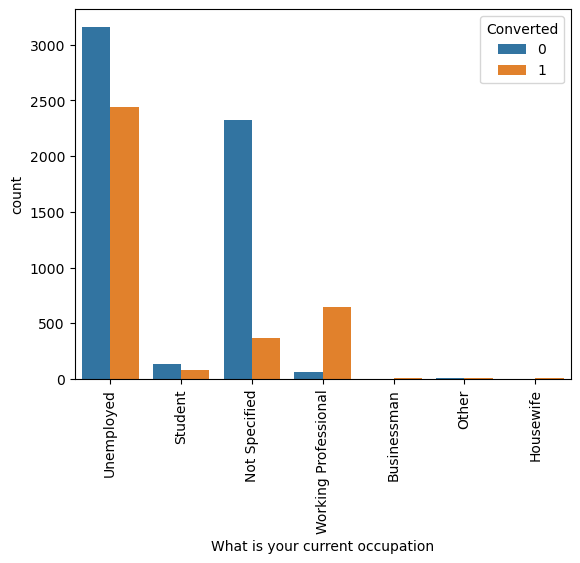

In [28]:
s1=sns.countplot(x=leads_df['What is your current occupation'], hue=leads_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Insights
- Though the lead count is less, Working Professionals have a highest conversion rate.
- Lead count for Unemployed segment is the highest and conversion rate is also good.
- While the lead count under Not Specified category is very good, conversion rate is comparitevly low against the previous two.

### What matters most to you in choosing a course
Checking value counts

In [29]:
leads_df['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

#### Replace the NULL values with "Not Specified"

In [30]:
#leads_df.drop('What matters most to you in choosing a course', axis=1, inplace=True)
leads_df['What matters most to you in choosing a course'] = leads_df['What matters most to you in choosing a course'].replace(np.nan, 'Not Specified')
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Not Specified,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Specified,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


#### Plotting spread of the feature

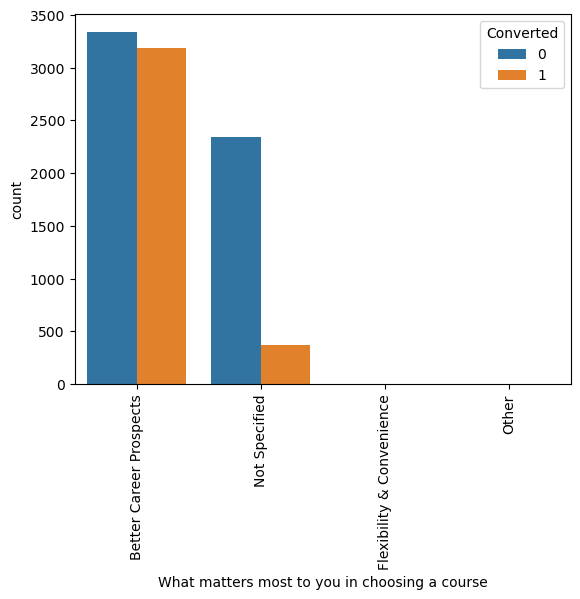

In [31]:
s1=sns.countplot(x=leads_df['What matters most to you in choosing a course'], hue=leads_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### Tag
Checking value counts

In [32]:
leads_df['Tags'].value_counts(dropna=False)

Tags
NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

#### Replace the NULL values with "Not Specified"

In [33]:
leads_df.Tags.fillna('Not Specified', inplace=True)
leads_df['Tags'].value_counts(dropna=False)

Tags
Not Specified                                        3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

#### Plotting spread of the feature

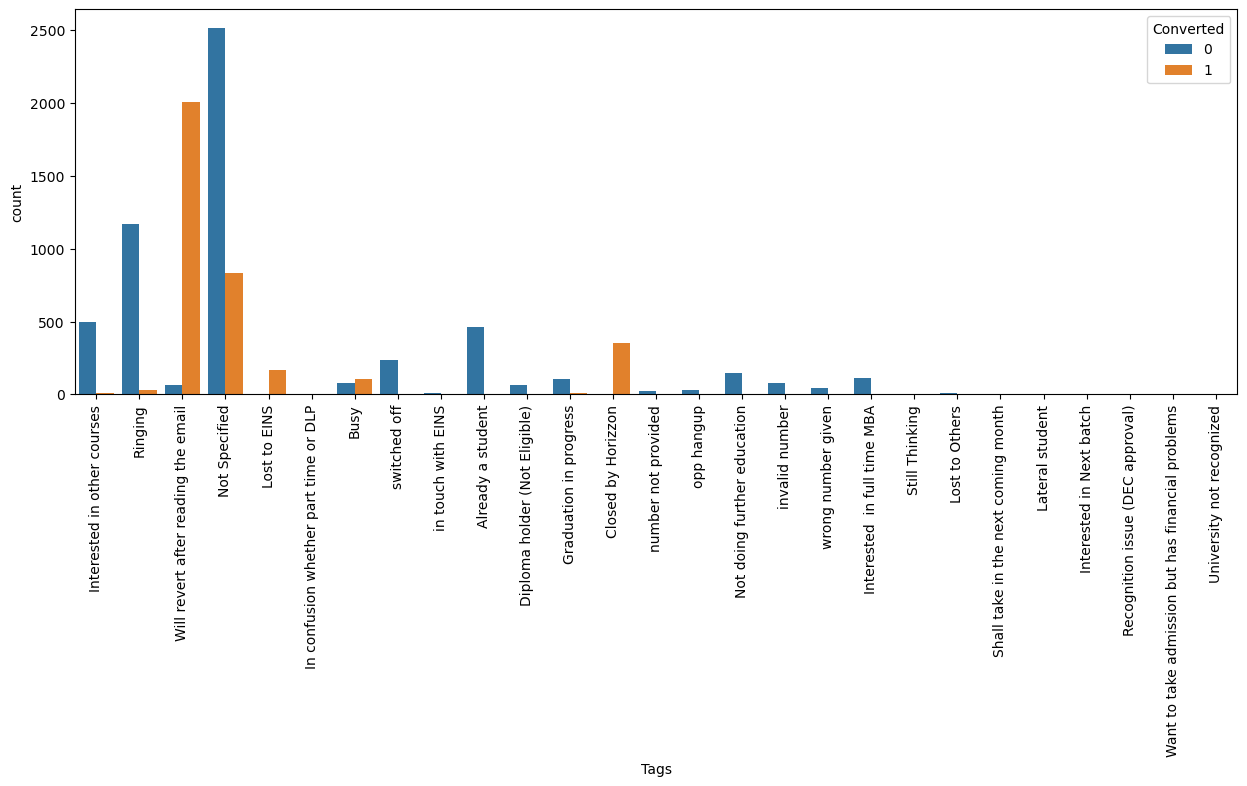

In [34]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads_df['Tags'], hue=leads_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Combining values with low frequency under "Other Tags"

In [35]:
leads_df['Tags'] = leads_df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS',
                                             'Diploma holder (Not Eligible)', 'Approached upfront','Graduation in progress',
                                             'number not provided', 'opp hangup','Still Thinking', 'Lost to Others',
                                             'Shall take in the next coming month','Lateral student',
                                             'Interested in Next batch', 'Recognition issue (DEC approval)',
                                             'Want to take admission but has financial problems',
                                             'University not recognized', 'switched off', 'Already a student',
                                             'Not doing further education', 'invalid number', 'wrong number given',
                                             'Interested  in full time MBA'],
                                            'Other Tags')

#### Re-plotting spread of the feature

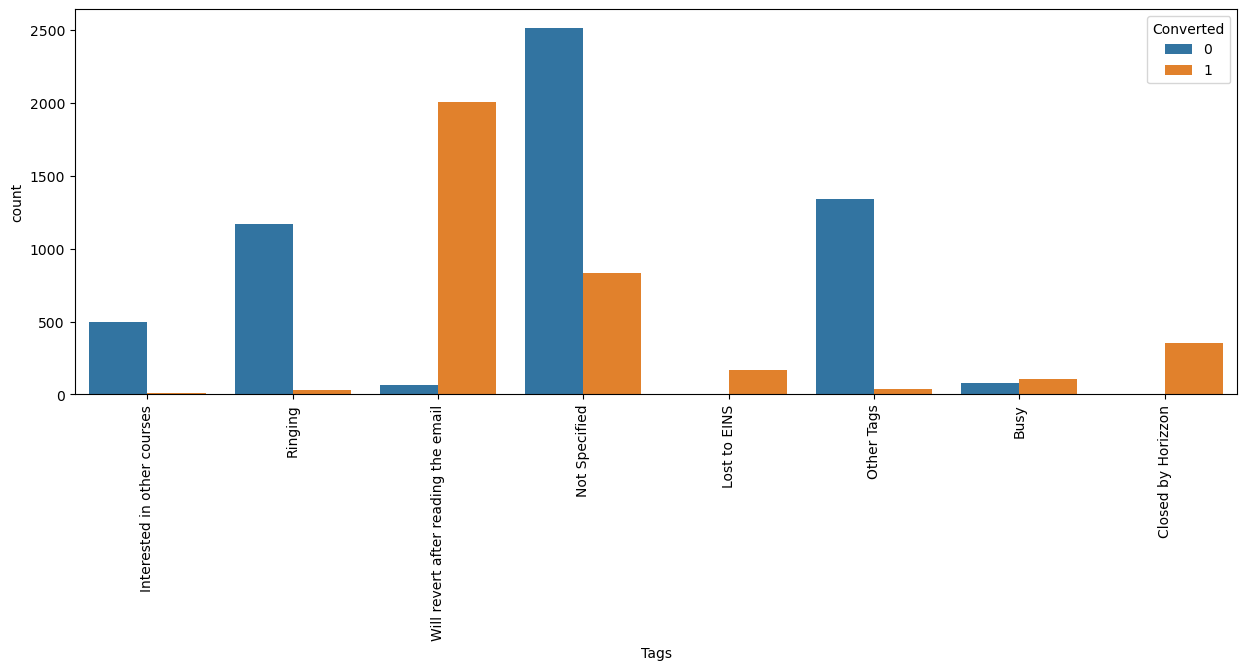

In [36]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads_df['Tags'], hue=leads_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### Checking percentage of missing values again for entire dataset

In [37]:
round(100*(leads_df.isnull().sum()/len(leads_df)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations                          0.00
Tags                        

### Lead Source
Checking value counts

In [38]:
leads_df['Lead Source'].value_counts(dropna=False)

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

#### The `Lead Source` column seem to be skewed towards certain values. There are a lot of low frequency values as well. Let us fix them by changing them to more meanful values.

In [39]:
leads_df['Lead Source'] = leads_df['Lead Source'].replace(np.nan,'Others')
leads_df['Lead Source'] = leads_df['Lead Source'].replace('google','Google')
leads_df['Lead Source'] = leads_df['Lead Source'].replace('Facebook','Social Media')
leads_df['Lead Source'] = leads_df['Lead Source'].replace(['bing','Click2call','Press_Release', 'youtubechannel',
                                                           'welearnblog_Home', 'WeLearn','blog','Pay per Click Ads',
                                                           'testone','NC_EDM', 'Live Chat'] ,
                                                          'Other Sources')

leads_df['Lead Source'].value_counts(dropna=False)

Lead Source
Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Others                36
Other Sources         21
Name: count, dtype: int64

#### Plotting spread of the feature

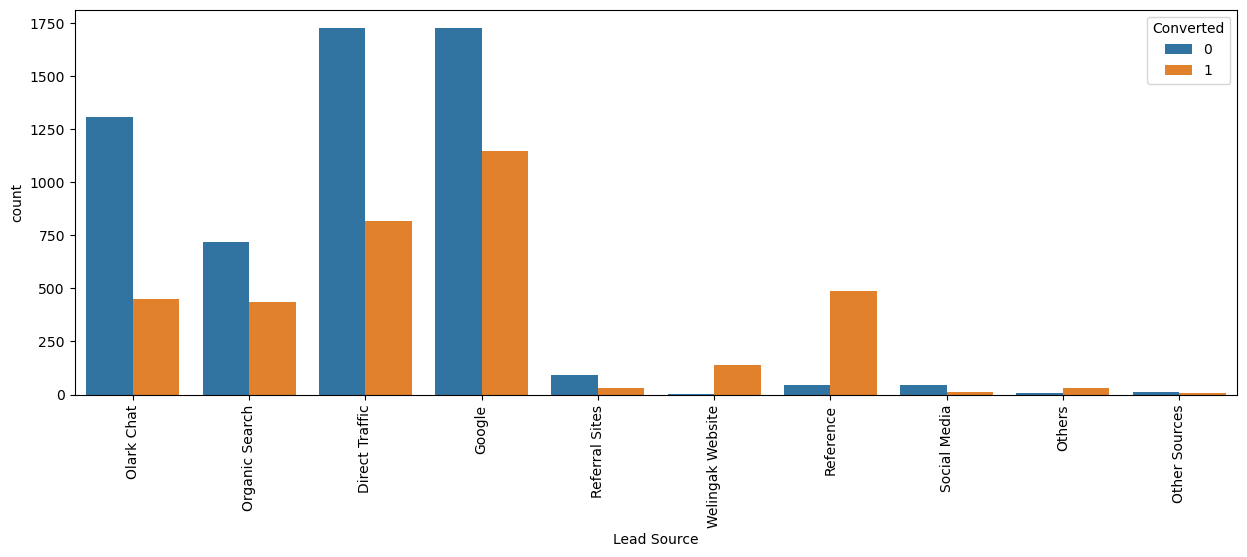

In [40]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads_df['Lead Source'], hue=leads_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Insights:
- Maximum leads are generated from Google and Direct Traffic and the conversion rate is also good
- The conversion rate is very high for leads generated from Welingak Website and Reference
- The company should work on increasing their leads from Welingak Website and Reference
- While the lead count from Organic search is comparatively low, conversion rate is very good
- The company should work on introducing better strategies for lead conversion from Olark Chat, Organic Search, Direct Traffic and Google

### Last Activity
Checking value counts

In [41]:
leads_df['Last Activity'].value_counts(dropna=False)

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

#### Replace the NULL values with "Others" and combining variables with low frequency

In [42]:
leads_df['Last Activity'] = leads_df['Last Activity'].replace(np.nan,'Others')
leads_df['Last Activity'] = leads_df['Last Activity'].replace(['Unreachable','Unsubscribed', 'Had a Phone Conversation',
                                                               'Approached upfront', 'View in browser link Clicked',
                                                               'Email Marked Spam', 'Email Received',
                                                               'Resubscribed to emails', 'Visited Booth in Tradeshow'],
                                                              'Others')
leads_df['Last Activity'].value_counts(dropna=False)

Last Activity
Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: count, dtype: int64

#### Plotting spread of the feature

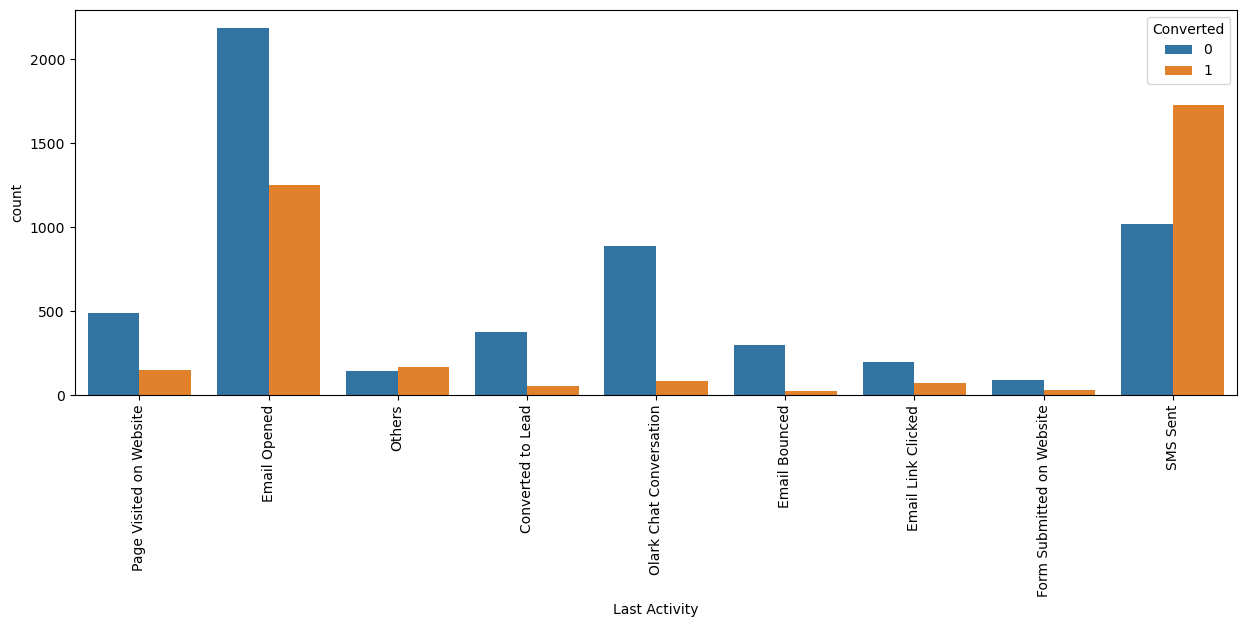

In [43]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads_df['Last Activity'], hue=leads_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### Check the Null Values in All Columns:

In [44]:
round(100*(leads_df.isnull().sum()/len(leads_df)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations                          0.00
Tags                        

#### Since the missing values are less than 2% we can choose to drop the NAN rows

In [45]:
leads_df = leads_df.dropna()
round(100*(leads_df.isnull().sum()/len(leads_df)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                          0.0
Tags                                          

### Lead Origin
Checking value counts

In [46]:
leads_df['Lead Origin'].value_counts(dropna=False)

Lead Origin
Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: count, dtype: int64

#### Plotting spread of the feature

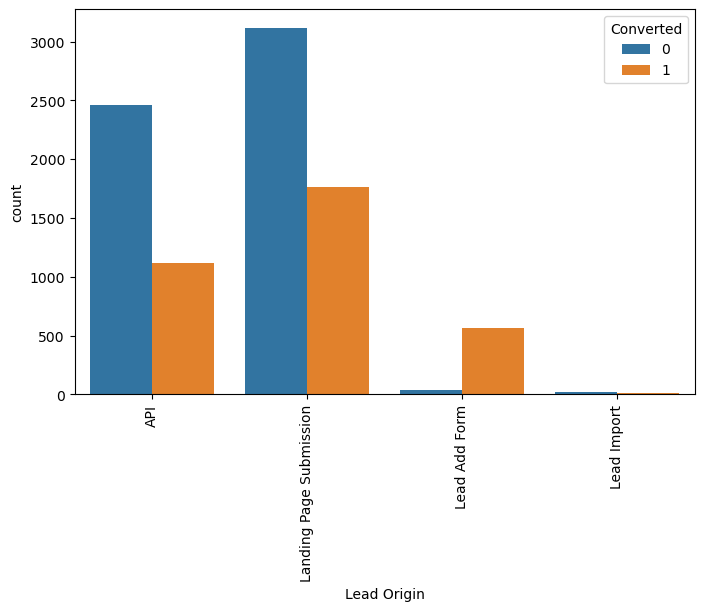

In [47]:
plt.figure(figsize=(8,5))
s1=sns.countplot(x=leads_df['Lead Origin'], hue=leads_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### Inference

- `Landing Page Submission` and `API` have the highest number of leads as well as conversion
- `Lead Add Form` has a very high conversion rate but count of leads generated is not very high
- `Lead Import` has negligible leads
- In order to improve overall lead conversion rate, we have to improve lead converion of `API` and `Landing Page Submission` origin and generate more leads from `Lead Add Form`

### Last Notable Activity
Checking value counts

In [48]:
#checking value counts of last Notable Activity
leads_df['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

#### Plotting spread of the feature

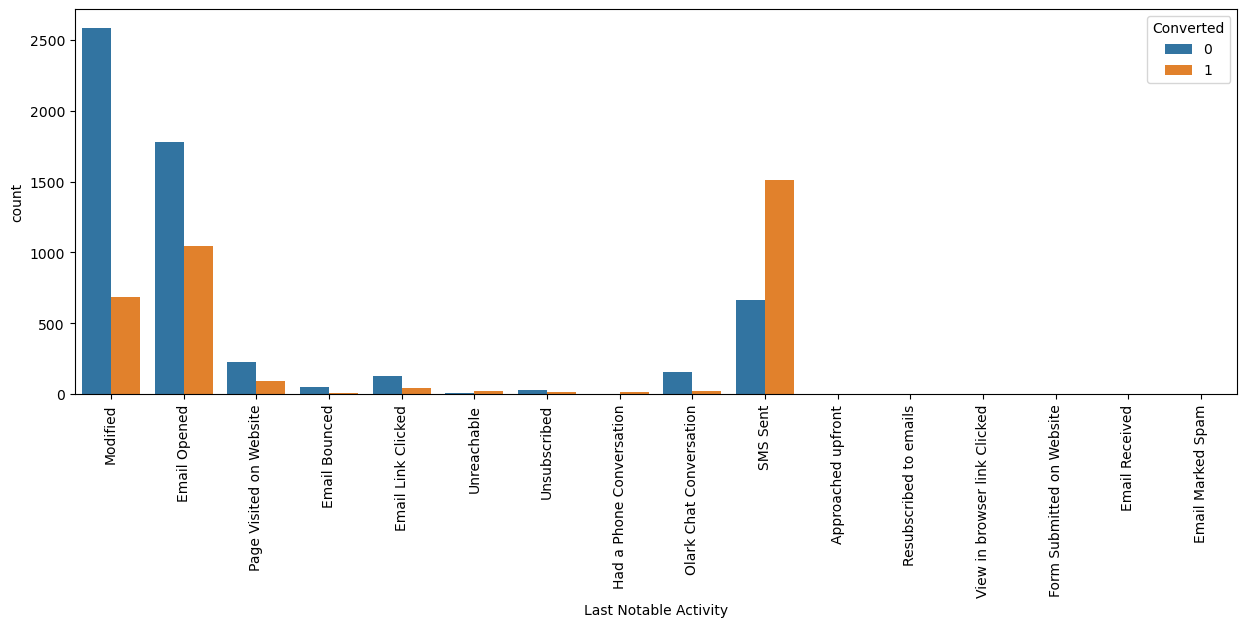

In [49]:
plt.figure(figsize = (15,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads_df)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

#### Clubbing lower frequency values and checking the value count

In [50]:
leads_df['Last Notable Activity'] = leads_df['Last Notable Activity'].replace(['Had a Phone Conversation',  'Email Marked Spam',
                                                                               'Unreachable', 'Unsubscribed',
                                                                               'Email Bounced', 'Resubscribed to emails',
                                                                               'View in browser link Clicked', 'Approached upfront',
                                                                               'Form Submitted on Website', 'Email Received'],
                                                                              'Other Activity')
leads_df['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other Activity              160
Name: count, dtype: int64

#### Plotting spread of the feature

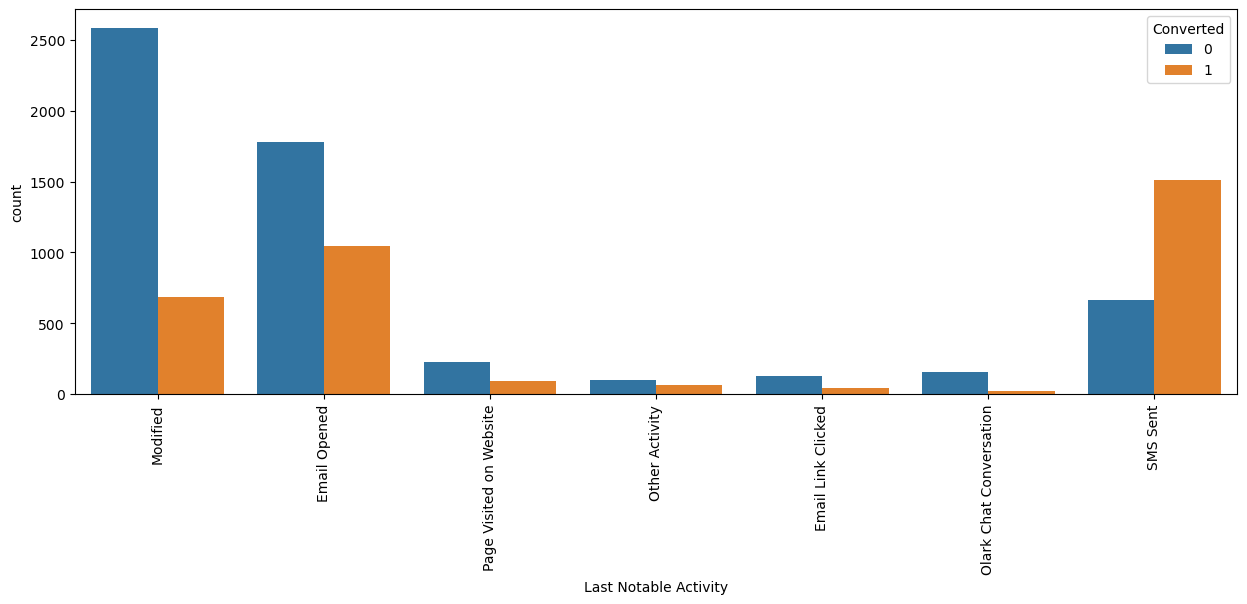

In [51]:
plt.figure(figsize = (15,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads_df)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

#### There are 9 features for which the values are in Binary form (Yes/No). Let's evaluate the value split to assess the usability of these features in our analysis

Let us check the columns having variable imbalance

In [52]:
cols_chk_imbal = ["A free copy of Mastering The Interview",'Do Not Email','Do Not Call','Search',
                  'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement',
                  'Through Recommendations'                 ]

for c in cols_chk_imbal:
  print(leads_df[c].value_counts(dropna=False))
  print('='*30)

A free copy of Mastering The Interview
No     6215
Yes    2888
Name: count, dtype: int64
Do Not Email
No     8379
Yes     724
Name: count, dtype: int64
Do Not Call
No     9101
Yes       2
Name: count, dtype: int64
Search
No     9089
Yes      14
Name: count, dtype: int64
Newspaper Article
No     9101
Yes       2
Name: count, dtype: int64
X Education Forums
No     9102
Yes       1
Name: count, dtype: int64
Newspaper
No     9102
Yes       1
Name: count, dtype: int64
Digital Advertisement
No     9099
Yes       4
Name: count, dtype: int64
Through Recommendations
No     9096
Yes       7
Name: count, dtype: int64


#### Except the variable "A free copy of Mastering The Interview" & 'Do Not Email', all others have nearly one-sided answers (mostly No), so we don't think it would give us much of an insight

Since the values in these columns are imbalanced we can choose to drop these columns

In [53]:
cols_chk_imbal = ['Do Not Call','Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
                  'Digital Advertisement', 'Through Recommendations']

In [54]:
leads_df.drop(cols_chk_imbal, axis=1, inplace=True)
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Better Career Prospects,Interested in other courses,Not Specified,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Better Career Prospects,Ringing,Not Specified,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,No,Modified


### A free copy of Mastering The Interview
Checking value counts

In [55]:
leads_df['A free copy of Mastering The Interview'].value_counts(dropna=False)

A free copy of Mastering The Interview
No     6215
Yes    2888
Name: count, dtype: int64

#### Plotting spread of the feature

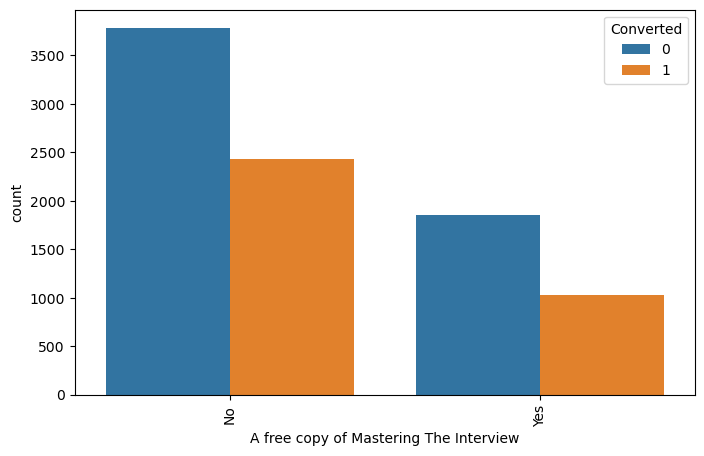

In [56]:
plt.figure(figsize=(8,5))
s1=sns.countplot(x=leads_df['A free copy of Mastering The Interview'], hue=leads_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### Do Not Email
Checking value counts"

In [57]:
leads_df['Do Not Email'].value_counts(dropna=False)

Do Not Email
No     8379
Yes     724
Name: count, dtype: int64

#### Plotting spread of the feature

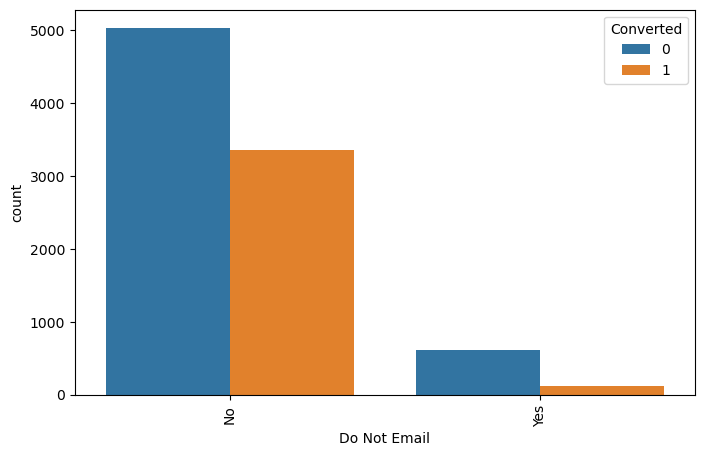

In [58]:
plt.figure(figsize=(8,5))
s1=sns.countplot(x=leads_df['Do Not Email'], hue=leads_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### Checking the dataset

In [59]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9103 non-null   object 
 1   Lead Source                                    9103 non-null   object 
 2   Do Not Email                                   9103 non-null   object 
 3   Converted                                      9103 non-null   int64  
 4   TotalVisits                                    9103 non-null   float64
 5   Total Time Spent on Website                    9103 non-null   int64  
 6   Page Views Per Visit                           9103 non-null   float64
 7   Last Activity                                  9103 non-null   object 
 8   Specialization                                 9103 non-null   object 
 9   What is your current occupation                9103 non-n

#### We can see that the dataset seems to have cleaner values than before with 0 Null values

### Univariate Analysis for Numerical variables

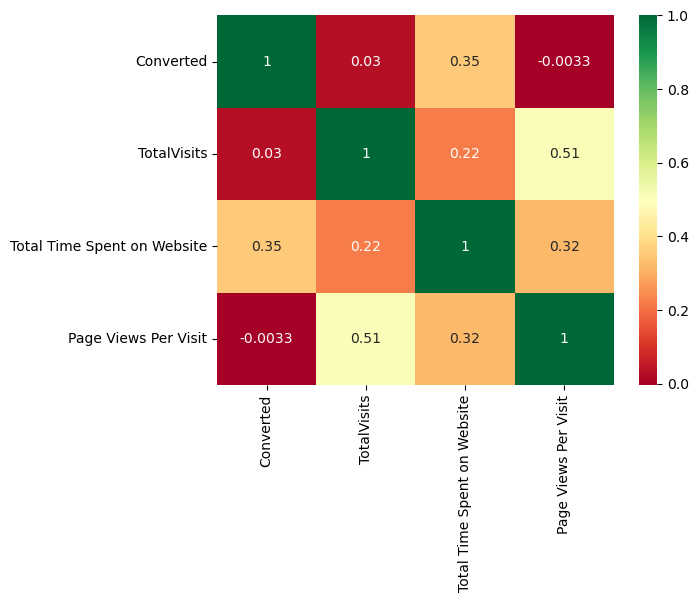

In [60]:
# Check the correlation

sns.heatmap(leads_df.corr(numeric_only=True), annot=True, cmap='RdYlGn')
plt.show()

In [61]:
# Check the percentage of data that has Converted Values = 1:

conv_perc = (sum(leads_df['Converted'])/len(leads_df))*100
conv_perc

38.02043282434362

#### The dataset shows that the current lead conversion rate is 38%

### Handling Outliers

#### Let's create a function for outlier treatment to remove top and bottom 1% records

In [62]:
def outlier_treatment(df, col):
  Q3 = df[col].quantile(0.99)
  df = df[(df[col] <= Q3)]

  Q1 = df[col].quantile(0.01)
  df = df[(df[col] >= Q1)]

  plt.figure(figsize=(6,4))
  sns.boxplot(y=df[col])
  plt.show()

  return df

#### Plotting box plot to check outliers for TotalVisits

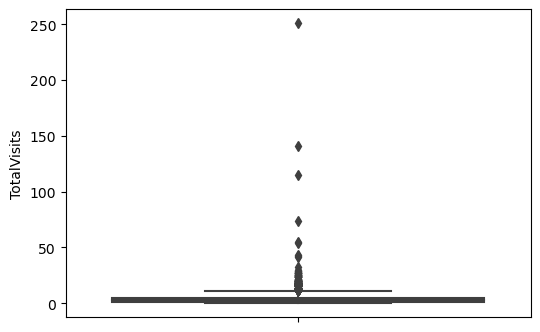

In [63]:
plt.figure(figsize=(6,4))
sns.boxplot(y=leads_df['TotalVisits'])
plt.show()

The above box plot shows that `TotalVisits` column has outliers and we need to treat them.

In [64]:
leads_df['TotalVisits'].describe(percentiles=[0.05,0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

#### We see a lot of variation of data between 95%, 99% and 100% so we will remove the top 1% outlier values

#### Plotting box plot again to check outliers for TotalVisits

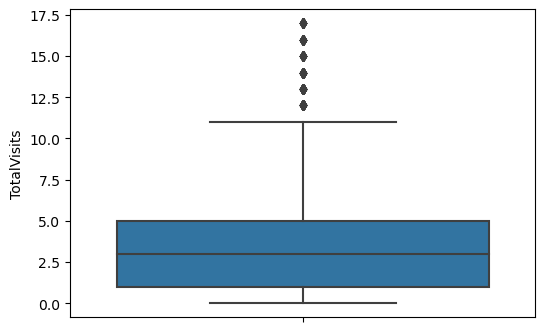

In [65]:
leads_df = outlier_treatment(leads_df, 'TotalVisits')

#### Plotting box plot to check outliers for Total Time Spent on Website

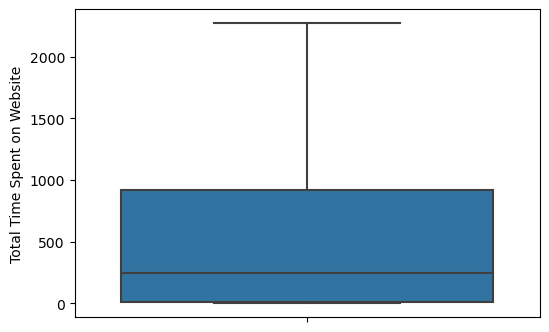

In [66]:
plt.figure(figsize=(6,4))
sns.boxplot(y=leads_df['Total Time Spent on Website'])
plt.show()

In [67]:
leads_df['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

#### Though more than 75% of values are below 1000, there are no outliers in `Total Time Spent on Website` column

#### Plotting box plot to check outliers for Page Views Per Visit

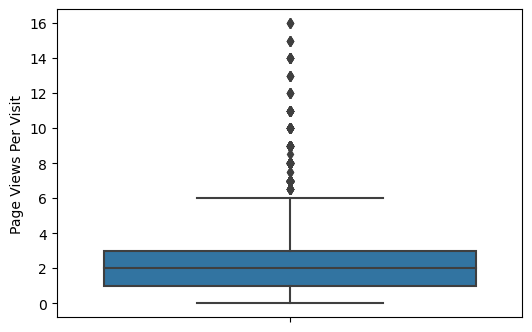

In [68]:
plt.figure(figsize=(6,4))
sns.boxplot(y=leads_df['Page Views Per Visit'])
plt.show()

In [69]:
leads_df['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

#### We see a lot of variation of data between 99% and 100% so we will remove the top 1% outlier values

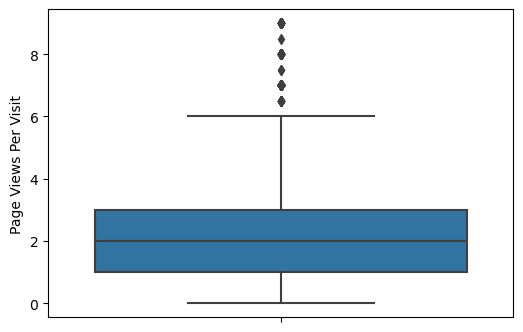

In [70]:
leads_df = outlier_treatment(leads_df, 'Page Views Per Visit')

### Dummy variable creation

#### Getting a list of categorical columns

In [71]:
cat_cols= leads_df.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### We will convert the binary columns to 0/1 values using Map function

In [72]:
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

In [73]:
binary_cols =  ['A free copy of Mastering The Interview','Do Not Email']
leads_df[binary_cols] = leads_df[binary_cols].apply(binary_map)
leads_df[binary_cols].head()

,A free copy of Mastering The Interview,Do Not Email
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


### Creating dummy variables

In [74]:
def create_dummy_cols(df, col, prefix, drop_col):
  if (drop_col == ''):
    dummy_df = pd.get_dummies(df[col], dtype='int', prefix=prefix, drop_first=True)
  else:
    dummy_df = pd.get_dummies(df[col], dtype='int', prefix=prefix)
    dummy_df = dummy_df.drop(drop_col, axis=1)

  df = pd.concat([df, dummy_df], axis=1)

  return df

In [75]:
leads_df = create_dummy_cols(leads_df, 'Lead Origin', 'Lead_Origin', '')
leads_df = create_dummy_cols(leads_df, 'Lead Source', 'Lead_Source', 'Lead_Source_Others')
leads_df = create_dummy_cols(leads_df, 'Last Activity', 'Last_Activity', 'Last_Activity_Others')
leads_df = create_dummy_cols(leads_df, 'Specialization', 'Specialization', 'Specialization_Not Specified')
leads_df = create_dummy_cols(leads_df, 'What is your current occupation', 'Current_Occupation', '')
leads_df = create_dummy_cols(leads_df, 'What matters most to you in choosing a course', 'Choosing_Course', 'Choosing_Course_Other')
leads_df = create_dummy_cols(leads_df, 'Tags', 'Tags', 'Tags_Not Specified')
leads_df = create_dummy_cols(leads_df, 'City', 'City', 'City_Not Specified')
leads_df = create_dummy_cols(leads_df, 'Last Notable Activity', 'Last_Notable_Activity', 'Last_Notable_Activity_Other Activity')

leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Other Sources,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_Welingak Website,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Current_Occupation_Housewife,Current_Occupation_Not Specified,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,Choosing_Course_Better Career Prospects,Choosing_Course_Flexibility & Convenience,Choosing_Course_Not Specified,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Better Career Prospects,Interested in other courses,Not Specified,0,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Better Career Prospects,Ringing,Not Specified,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Mumbai,1,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Mumbai,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,0,Modified,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0


#### Remove the Binary cols from the category cols list and then drop the original cols from the dataframe

In [76]:
cat_cols = list(cat_cols)
cat_cols.remove('A free copy of Mastering The Interview')
cat_cols.remove('Do Not Email')

leads_df = leads_df.drop(cat_cols, axis=1)
leads_df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Other Sources,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_Welingak Website,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Current_Occupation_Housewife,Current_Occupation_Not Specified,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,Choosing_Course_Better Career Prospects,Choosing_Course_Flexibility & Convenience,Choosing_Course_Not Specified,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0


## Step 4: Test-Train Split

## Test - Train split and Logistic regression model building

#### Putting "Converted" variable to y

In [77]:
y = leads_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

#### Putting feature variables to X

In [78]:
X = leads_df.drop('Converted', axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Other Sources,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_Welingak Website,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Current_Occupation_Housewife,Current_Occupation_Not Specified,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,Choosing_Course_Better Career Prospects,Choosing_Course_Flexibility & Convenience,Choosing_Course_Not Specified,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0


#### Splitting the data into train and test

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

#### Verify if the dataset has been split correctly

In [80]:
print(X_train.shape)
print(X_test.shape)

(6267, 63)
(2686, 63)


#### View Train dataset before scaling

In [81]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Other Sources,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_Welingak Website,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Current_Occupation_Housewife,Current_Occupation_Not Specified,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,Choosing_Course_Better Career Prospects,Choosing_Course_Flexibility & Convenience,Choosing_Course_Not Specified,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
3385,0,2.0,289,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2273,0,0.0,0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4234,0,4.0,111,4.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
945,0,3.0,415,3.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
8689,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Step 5: Feature Scaling

#### Scaling of non-binary columns in train dataset

In [82]:
scaler = StandardScaler()
cols_to_scale = ['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Other Sources,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_Welingak Website,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Current_Occupation_Housewife,Current_Occupation_Not Specified,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,Choosing_Course_Better Career Prospects,Choosing_Course_Flexibility & Convenience,Choosing_Course_Not Specified,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
3385,0,-0.387896,-0.352398,-0.125473,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2273,0,-1.078701,-0.882395,-1.191680,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4234,0,0.302909,-0.678832,0.940734,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
945,0,-0.042493,-0.121327,0.407631,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
8689,0,-1.078701,-0.882395,-1.191680,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


#### Checking the "Convertion Rate"

In [83]:
Converted = (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
Converted

37.92025019546521

#### Convertion Rate is almost 38%

## Step 6: Looking at Correlations

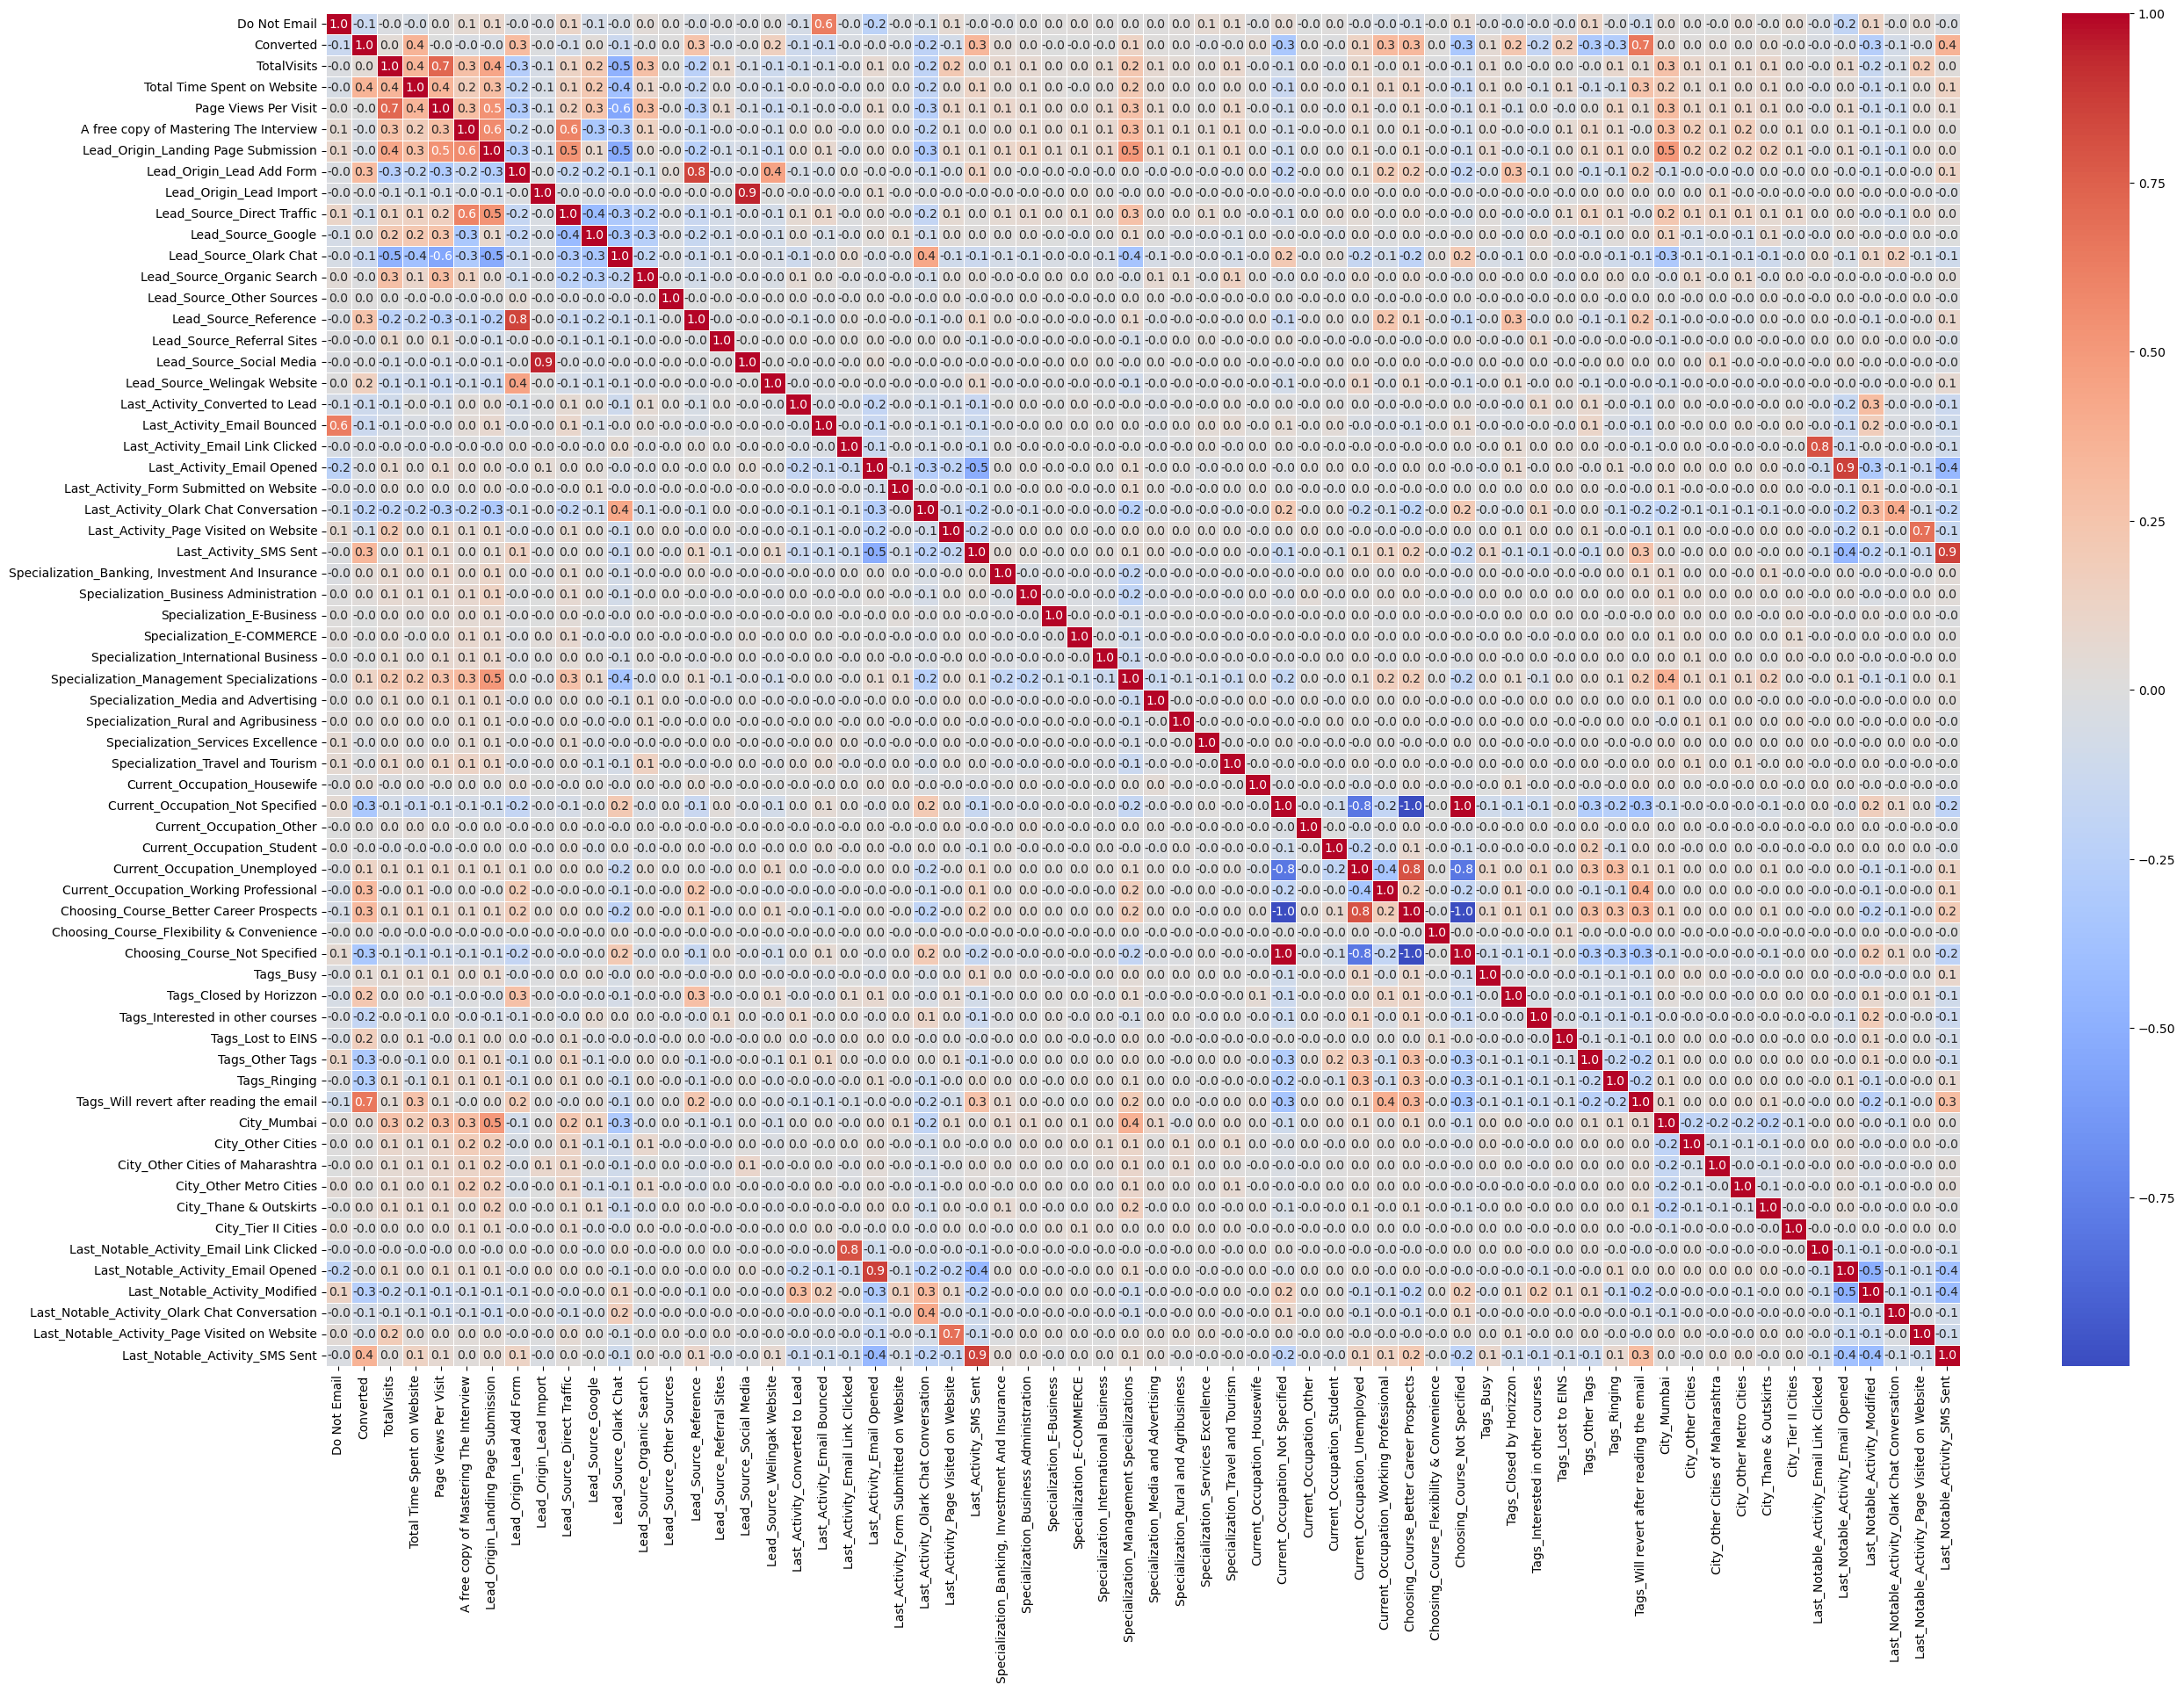

In [84]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(leads_df.corr(),annot = True, cmap='coolwarm', fmt=".1f", linewidths=0.5)
plt.show()

#### Due to high number of features, it is very difficult to identify the correlation between them and thus we would use RFE to select the top 15 features for model building


## Step 7: Model Building

In [85]:
X_train.shape

(6267, 63)

## Step 8: Feature Selection Using RFE

In [86]:
log_reg = LogisticRegression()

rfe = RFE(log_reg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [87]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 4),
 ('TotalVisits', False, 29),
 ('Total Time Spent on Website', False, 2),
 ('Page Views Per Visit', False, 28),
 ('A free copy of Mastering The Interview', False, 39),
 ('Lead_Origin_Landing Page Submission', False, 11),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Origin_Lead Import', False, 45),
 ('Lead_Source_Direct Traffic', False, 17),
 ('Lead_Source_Google', False, 20),
 ('Lead_Source_Olark Chat', True, 1),
 ('Lead_Source_Organic Search', False, 19),
 ('Lead_Source_Other Sources', False, 32),
 ('Lead_Source_Reference', False, 27),
 ('Lead_Source_Referral Sites', False, 18),
 ('Lead_Source_Social Media', False, 15),
 ('Lead_Source_Welingak Website', True, 1),
 ('Last_Activity_Converted to Lead', False, 8),
 ('Last_Activity_Email Bounced', False, 10),
 ('Last_Activity_Email Link Clicked', False, 41),
 ('Last_Activity_Email Opened', False, 31),
 ('Last_Activity_Form Submitted on Website', False, 46),
 ('Last_Activity_Olark Chat Conversation', False, 7

In [88]:
#list of RFE supported columns
rfe_cols = list(X_train.columns[rfe.support_])
rfe_cols

['Lead_Origin_Lead Add Form',
 'Lead_Source_Olark Chat',
 'Lead_Source_Welingak Website',
 'Last_Activity_SMS Sent',
 'Choosing_Course_Better Career Prospects',
 'Choosing_Course_Not Specified',
 'Tags_Busy',
 'Tags_Closed by Horizzon',
 'Tags_Interested in other courses',
 'Tags_Lost to EINS',
 'Tags_Other Tags',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Last_Notable_Activity_Modified',
 'Last_Notable_Activity_Olark Chat Conversation']

### Building Model # 1

In [89]:
X_train_sm = sm.add_constant(X_train[rfe_cols])
log1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = log1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1250.7
Date:                Mon, 19 Feb 2024   Deviance:                       2501.3
Time:                        15:40:14   Pearson chi2:                 8.33e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6071
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.9128      9.517      0.096      0.924     -17.740      19.565
Lead_Origin_Lead Add Form                         0.2864      0.410      0.699      0.485      -0.517       1.090
Lead_Source_Olark Chat                           -0.1200      0.136     -0.885      0.376      -0.386       0.146
Lead_Source_Welingak Website                      2.5857      1.109      2.332      0.020       0.412       4.759
Last_Activity_SMS Sent                            2.0640      0.120     17.162      0.000       1.828       2.300
Choosing_Course_Better Career Prospects          -0.2955      9.516     -0.031      0.975     -18.947      18.356
Choosing_Course_Not Specified                    -2.8905      9.516     -0.304      0.761     -21.542      15.761
Tags_Busy                                        -1.2238      0.239     -5.120      0.000      -1.692      -0.755
Tags_Closed by Horizzon                           5.6367      1.024      5.507      0.000       3.630       7.643
Tags_Interested in other courses                 -3.3575      0.344     -9.763      0.000      -4.031      -2.683
Tags_Lost to EINS                                 5.9815      0.739      8.092      0.000       4.533       7.430
Tags_Other Tags                                  -4.5111      0.244    -18.479      0.000      -4.990      -4.033
Tags_Ringing                                     -5.1743      0.258    -20.047      0.000      -5.680      -4.668
Tags_Will revert after reading the email          2.7081      0.207     13.111      0.000       2.303       3.113
Last_Notable_Activity_Modified                   -1.5880      0.126    -12.613      0.000      -1.835      -1.341
Last_Notable_Activity_Olark Chat Conversation    -1.3632      0.399     -3.421      0.001      -2.144      -0.582
=================================================================================================================
"""

#### We can see that p-values for some variables is not in acceptable range. We will calculate the VIF to understand the multicollenearity in the variables and then decide which columns to drop

#### VIF Calculation

In [90]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Choosing_Course_Better Career Prospects,10.29
12,Tags_Will revert after reading the email,3.97
10,Tags_Other Tags,3.03
11,Tags_Ringing,2.66
13,Last_Notable_Activity_Modified,1.90
5,Choosing_Course_Not Specified,1.72
3,Last_Activity_SMS Sent,1.68
8,Tags_Interested in other courses,1.68
0,Lead_Origin_Lead Add Form,1.59
7,Tags_Closed by Horizzon,1.55


The VIF for `Choosing_Course_Better Career Prospects` is way above the accepted values. Let us drop the column and recalculate the values

In [91]:
rfe_cols.remove('Choosing_Course_Better Career Prospects')
rfe_cols

['Lead_Origin_Lead Add Form',
 'Lead_Source_Olark Chat',
 'Lead_Source_Welingak Website',
 'Last_Activity_SMS Sent',
 'Choosing_Course_Not Specified',
 'Tags_Busy',
 'Tags_Closed by Horizzon',
 'Tags_Interested in other courses',
 'Tags_Lost to EINS',
 'Tags_Other Tags',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Last_Notable_Activity_Modified',
 'Last_Notable_Activity_Olark Chat Conversation']

### Building Model # 2

In [92]:
X_train_sm = sm.add_constant(X_train[rfe_cols])
log2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = log2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1250.7
Date:                Mon, 19 Feb 2024   Deviance:                       2501.4
Time:                        15:40:14   Pearson chi2:                 8.33e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6071
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.6173      0.136      4.528      0.000       0.350       0.884
Lead_Origin_Lead Add Form                         0.2864      0.410      0.699      0.485      -0.517       1.090
Lead_Source_Olark Chat                           -0.1200      0.136     -0.885      0.376      -0.386       0.146
Lead_Source_Welingak Website                      2.5857      1.109      2.332      0.020       0.412       4.759
Last_Activity_SMS Sent                            2.0640      0.120     17.161      0.000       1.828       2.300
Choosing_Course_Not Specified                    -2.5950      0.147    -17.598      0.000      -2.884      -2.306
Tags_Busy                                        -1.2238      0.239     -5.120      0.000      -1.692      -0.755
Tags_Closed by Horizzon                           5.6366      1.024      5.507      0.000       3.630       7.643
Tags_Interested in other courses                 -3.3575      0.344     -9.763      0.000      -4.031      -2.683
Tags_Lost to EINS                                 5.9825      0.739      8.100      0.000       4.535       7.430
Tags_Other Tags                                  -4.5110      0.244    -18.479      0.000      -4.989      -4.033
Tags_Ringing                                     -5.1743      0.258    -20.047      0.000      -5.680      -4.668
Tags_Will revert after reading the email          2.7081      0.207     13.111      0.000       2.303       3.113
Last_Notable_Activity_Modified                   -1.5880      0.126    -12.613      0.000      -1.835      -1.341
Last_Notable_Activity_Olark Chat Conversation    -1.3632      0.399     -3.421      0.001      -2.144      -0.582
=================================================================================================================
"""

#### VIF Calculation

In [93]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last_Notable_Activity_Modified,1.85
4,Choosing_Course_Not Specified,1.61
0,Lead_Origin_Lead Add Form,1.59
3,Last_Activity_SMS Sent,1.56
11,Tags_Will revert after reading the email,1.47
1,Lead_Source_Olark Chat,1.32
2,Lead_Source_Welingak Website,1.30
9,Tags_Other Tags,1.22
6,Tags_Closed by Horizzon,1.19
7,Tags_Interested in other courses,1.14


#### The VIF values seem to be good but the p-values for some varaibles is unacceptable.

In [94]:
rfe_cols.remove('Lead_Origin_Lead Add Form')
rfe_cols

['Lead_Source_Olark Chat',
 'Lead_Source_Welingak Website',
 'Last_Activity_SMS Sent',
 'Choosing_Course_Not Specified',
 'Tags_Busy',
 'Tags_Closed by Horizzon',
 'Tags_Interested in other courses',
 'Tags_Lost to EINS',
 'Tags_Other Tags',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Last_Notable_Activity_Modified',
 'Last_Notable_Activity_Olark Chat Conversation']

### Building Model # 3

In [95]:
X_train_sm = sm.add_constant(X_train[rfe_cols])
log3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = log3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1250.9
Date:                Mon, 19 Feb 2024   Deviance:                       2501.9
Time:                        15:40:15   Pearson chi2:                 8.27e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6070
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.6248      0.136      4.596      0.000       0.358       0.891
Lead_Source_Olark Chat                           -0.1236      0.136     -0.911      0.362      -0.389       0.142
Lead_Source_Welingak Website                      2.8649      1.034      2.770      0.006       0.838       4.892
Last_Activity_SMS Sent                            2.0666      0.120     17.198      0.000       1.831       2.302
Choosing_Course_Not Specified                    -2.6014      0.147    -17.669      0.000      -2.890      -2.313
Tags_Busy                                        -1.2315      0.239     -5.155      0.000      -1.700      -0.763
Tags_Closed by Horizzon                           5.7429      1.014      5.663      0.000       3.755       7.731
Tags_Interested in other courses                 -3.3589      0.344     -9.764      0.000      -4.033      -2.685
Tags_Lost to EINS                                 5.9889      0.738      8.110      0.000       4.541       7.436
Tags_Other Tags                                  -4.5156      0.244    -18.503      0.000      -4.994      -4.037
Tags_Ringing                                     -5.1714      0.258    -20.050      0.000      -5.677      -4.666
Tags_Will revert after reading the email          2.7308      0.204     13.357      0.000       2.330       3.132
Last_Notable_Activity_Modified                   -1.5933      0.126    -12.665      0.000      -1.840      -1.347
Last_Notable_Activity_Olark Chat Conversation    -1.3686      0.399     -3.429      0.001      -2.151      -0.586
=================================================================================================================
"""

#### VIF Calculation

In [96]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last_Notable_Activity_Modified,1.85
3,Choosing_Course_Not Specified,1.61
2,Last_Activity_SMS Sent,1.55
10,Tags_Will revert after reading the email,1.36
0,Lead_Source_Olark Chat,1.32
8,Tags_Other Tags,1.22
6,Tags_Interested in other courses,1.14
9,Tags_Ringing,1.13
12,Last_Notable_Activity_Olark Chat Conversation,1.08
5,Tags_Closed by Horizzon,1.07


#### Let us drop `Lead_Source_Olark Chat` since its p-value is not acceptable

In [97]:
rfe_cols.remove('Lead_Source_Olark Chat')
rfe_cols

['Lead_Source_Welingak Website',
 'Last_Activity_SMS Sent',
 'Choosing_Course_Not Specified',
 'Tags_Busy',
 'Tags_Closed by Horizzon',
 'Tags_Interested in other courses',
 'Tags_Lost to EINS',
 'Tags_Other Tags',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Last_Notable_Activity_Modified',
 'Last_Notable_Activity_Olark Chat Conversation']

### Building Model # 4

In [98]:
X_train_sm = sm.add_constant(X_train[rfe_cols])
log4 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = log4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6254
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1251.3
Date:                Mon, 19 Feb 2024   Deviance:                       2502.7
Time:                        15:40:15   Pearson chi2:                 8.27e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6070
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.5794      0.126      4.584      0.000       0.332       0.827
Lead_Source_Welingak Website                      2.9075      1.033      2.814      0.005       0.882       4.933
Last_Activity_SMS Sent                            2.0793      0.120     17.391      0.000       1.845       2.314
Choosing_Course_Not Specified                    -2.5901      0.147    -17.673      0.000      -2.877      -2.303
Tags_Busy                                        -1.2016      0.237     -5.075      0.000      -1.666      -0.738
Tags_Closed by Horizzon                           5.7787      1.013      5.702      0.000       3.792       7.765
Tags_Interested in other courses                 -3.3360      0.343     -9.717      0.000      -4.009      -2.663
Tags_Lost to EINS                                 5.9987      0.738      8.126      0.000       4.552       7.445
Tags_Other Tags                                  -4.4880      0.242    -18.546      0.000      -4.962      -4.014
Tags_Ringing                                     -5.1475      0.257    -20.066      0.000      -5.650      -4.645
Tags_Will revert after reading the email          2.7642      0.201     13.732      0.000       2.370       3.159
Last_Notable_Activity_Modified                   -1.5953      0.126    -12.688      0.000      -1.842      -1.349
Last_Notable_Activity_Olark Chat Conversation    -1.3852      0.397     -3.492      0.000      -2.163      -0.608
=================================================================================================================
"""

#### VIF Calculation

In [99]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last_Notable_Activity_Modified,1.83
1,Last_Activity_SMS Sent,1.55
2,Choosing_Course_Not Specified,1.47
9,Tags_Will revert after reading the email,1.35
7,Tags_Other Tags,1.20
5,Tags_Interested in other courses,1.14
8,Tags_Ringing,1.12
4,Tags_Closed by Horizzon,1.07
3,Tags_Busy,1.05
11,Last_Notable_Activity_Olark Chat Conversation,1.05


#### The p-values and VIF, both seem to be in acceptable range. We can proceed with our model prediction

#### Getting the predicted values on the train set

In [100]:
y_train_pred = res.predict(X_train_sm)
y_train_pred

3385    0.026442
2273    0.998933
4234    0.517134
945     0.002101
8689    0.059714
          ...   
5926    0.178474
5357    0.010272
5567    0.010272
916     0.010272
7509    0.640933
Length: 6267, dtype: float64

#### Re-shape y_train_pred to a 1D array

In [101]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.02644238, 0.99893331, 0.51713405, ..., 0.01027166, 0.01027166,
       0.64093332])

#### Data frame with given convertion rate and probablity of predicted ones

In [102]:
y_train_pred_df = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_df['Prospect ID'] = y_train.index
y_train_pred_df.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.026442,3385
1,1,0.998933,2273
2,0,0.517134,4234
3,0,0.002101,945
4,0,0.059714,8689


#### Let us assume initial cut off as 0.5

In [103]:
# Substituting 0 or 1 with the cut off as 0.5

y_train_pred_df['Predicted'] = y_train_pred_df.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_df.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.026442,3385,0
1,1,0.998933,2273,1
2,0,0.517134,4234,1
3,0,0.002101,945,0
4,0,0.059714,8689,0


### Model Evaluation

In [104]:
# Creating confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df.Predicted )
confusion

array([[3636,  216],
       [ 227, 2188]], dtype=int64)

In [105]:
# Predicted       not_converted    converted
# Actual
# not_converted    3636             216
# converted         227             2188

In [106]:
# Check the overall accuracy
print('Model accuracy is', round(metrics.accuracy_score(y_train_pred_df.Converted, y_train_pred_df.Predicted), 4) * 100, '%')

Model accuracy is 92.93 %


#### Accuracy is almost 93% which is quite good

In [107]:
# Substituting the value of true positive
TP = confusion[1,1]

# Substituting the value of true negatives
TN = confusion[0,0]

# Substituting the value of false positives
FP = confusion[0,1]

# Substituting the value of false negatives
FN = confusion[1,0]

In [108]:
# Calculating the sensitivity
sensitivity = round(TP/(TP+FN), 4) * 100
print('Model sensitivity is', sensitivity, '%')

Model sensitivity is 90.60000000000001 %


In [109]:
# Calculating the specificity
specificity = round(TN/(TN+FP), 4) * 100
print('Model specificity is', specificity, '%')

Model specificity is 94.39 %


With the current cut odd at 0.5, we get the following results:
- Model Accuracy = 92.93%
- Model Sensitivity = 90.6%
- Model Specificity = 94.39%

## Step 9: Plotting the ROC Curve

The previous cut off was selected at random. Let us now plot the ROC curve to find the optimal cut off value

In [110]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [111]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_df.Converted, y_train_pred_df.Converted_Prob, drop_intermediate = False )

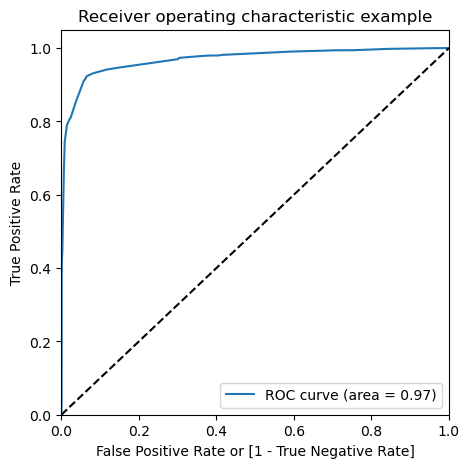

In [112]:
# Call the ROC function
  
draw_roc(y_train_pred_df.Converted, y_train_pred_df.Converted_Prob)

#### The area under the ROC curve is 0.97 which is a very good value.

## Step 10: Finding Optimal Cutoff Point

In [113]:
# Creating columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.026442,3385,0,1,0,0,0,0,0,0,0,0,0
1,1,0.998933,2273,1,1,1,1,1,1,1,1,1,1,1
2,0,0.517134,4234,1,1,1,1,1,1,1,0,0,0,0
3,0,0.002101,945,0,1,0,0,0,0,0,0,0,0,0
4,0,0.059714,8689,0,1,0,0,0,0,0,0,0,0,0


In [114]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
#from sklearn.metrics import confusion_matrix
num = [float(x)/10 for x in range(10)]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df[i] )
    total1=sum(sum(cm1))

    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])

    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,probability,accuracy,sensitivity,specificity
0.0,0.0,0.385352,1.000000,0.000000
0.1,0.1,0.803255,0.969772,0.698858
0.2,0.2,0.923249,0.931263,0.918224
0.3,0.3,0.929951,0.923810,0.933801
0.4,0.4,0.930110,0.910145,0.942627
0.5,0.5,0.929312,0.906004,0.943925
0.6,0.6,0.921015,0.855901,0.961838
0.7,0.7,0.911760,0.807867,0.976895
0.8,0.8,0.912558,0.806625,0.978972
0.9,0.9,0.894527,0.739545,0.991693


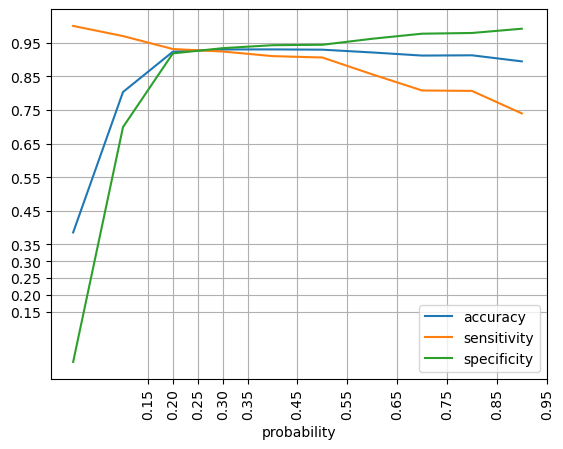

In [115]:
custom_bins = [0.15,0.20, 0.25, 0.30, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.xticks(custom_bins,rotation=90)
plt.yticks(custom_bins)
plt.grid(True)
plt.show()

#### From the graph, we can see that the optimal cut off value is 0.25

In [116]:
y_train_pred_df['final_predicted'] = y_train_pred_df.Converted_Prob.map( lambda x: 1 if x > 0.25 else 0)
y_train_pred_df.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.026442,3385,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.998933,2273,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.517134,4234,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.002101,945,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.059714,8689,0,1,0,0,0,0,0,0,0,0,0,0


### Assigning Lead Score to the Training data

In [117]:
y_train_pred_df['Lead_Score'] = y_train_pred_df.Converted_Prob.map( lambda x: round(x*100))

y_train_pred_df.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.026442,3385,0,1,0,0,0,0,0,0,0,0,0,0,3
1,1,0.998933,2273,1,1,1,1,1,1,1,1,1,1,1,1,100
2,0,0.517134,4234,1,1,1,1,1,1,1,0,0,0,0,1,52
3,0,0.002101,945,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0.059714,8689,0,1,0,0,0,0,0,0,0,0,0,0,6


#### Check the overall accuracy

In [118]:
print('Overall model accuracy is', round(metrics.accuracy_score(y_train_pred_df.Converted, y_train_pred_df.final_predicted), 4) * 100, '%')

Overall model accuracy is 92.32000000000001 %


#### Creating confusion matrix

In [119]:
confusion = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df.final_predicted )
confusion

array([[3537,  315],
       [ 166, 2249]], dtype=int64)

In [120]:
# Substituting the value of true positive
TP = confusion[1,1]

# Substituting the value of true negatives
TN = confusion[0,0]

# Substituting the value of false positives
FP = confusion[0,1]

# Substituting the value of false negatives
FN = confusion[1,0]

#### Calculating the sensitivity

In [121]:
sensitivity = round(TP/(TP+FN), 4) * 100
print('Overall model sensitivity is', sensitivity, '%')

Overall model sensitivity is 93.13 %


#### Calculating the specificity

In [122]:
specificity = round(TN/(TN+FP), 4)*100
print('Overall model specificity is', specificity, '%')

Overall model specificity is 91.82000000000001 %


#### Calculate false postive rate

In [123]:
False_Positive = round(FP/ float(TN+FP),4)*100
print("False Positive rate is ",False_Positive, '%')

False Positive rate is  8.18 %


#### Positive predictive value 

In [124]:
Positive_predictive = round(TP / float(TP+FP),4)*100

print("Positive predictive rate is ",Positive_predictive, '%')

Positive predictive rate is  87.71 %


#### Negative predictive value

In [125]:
Negative_predictive = round(TN / float(TN+ FN),4)*100

print("Negative predictive rate is ",Negative_predictive, '%')

Negative predictive rate is  95.52000000000001 %


With the cut off calculated by ROC curve at 0.25, we get the following results:

- Model Accuracy = 92.32%
- Model Sensitivity = 93.13%
- Model Specificity = 91.82%

## Precision and Recall

#### Looking at the confusion matrix again

In [126]:
confusion = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df.final_predicted )
confusion

array([[3537,  315],
       [ 166, 2249]], dtype=int64)

#### Precision
TP / TP + FP

In [127]:
Precision_rate = confusion[1,1]/(confusion[0,1]+confusion[1,1])*100

print ("Precision rate is ", Precision_rate, '%')

Precision rate is  87.7145085803432 %


#### Recall
TP / TP + FN

In [128]:
Recall_rate = confusion[1,1]/(confusion[1,0]+confusion[1,1])*100

print ("Recall rate is ", Recall_rate,"%")

Recall rate is  93.12629399585921 %


#### Using sklearn utilities to calculate and evaluate the same

In [129]:
precision_score = precision_score(y_train_pred_df.Converted, y_train_pred_df.final_predicted)*100
print ("Precision score is ", precision_score, '%')

Precision score is  87.7145085803432 %


In [130]:
recall_score = recall_score(y_train_pred_df.Converted, y_train_pred_df.final_predicted)*100
print ("Recall score is ", recall_score, '%')

Recall score is  93.12629399585921 %


### Precision and recall tradeoff

In [131]:
y_train_pred_df.Converted, y_train_pred_df.final_predicted

(0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6262    0
 6263    0
 6264    0
 6265    0
 6266    0
 Name: Converted, Length: 6267, dtype: int64,
 0       0
 1       1
 2       1
 3       0
 4       0
        ..
 6262    0
 6263    0
 6264    0
 6265    0
 6266    1
 Name: final_predicted, Length: 6267, dtype: int64)

In [132]:
p, r, thresholds = precision_recall_curve(y_train_pred_df.Converted, y_train_pred_df.Converted_Prob)

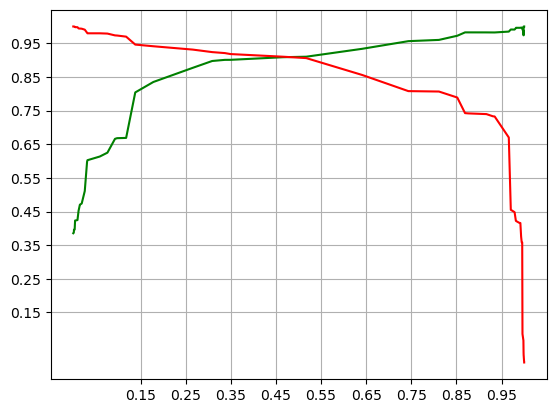

In [133]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")

custom_bins = [0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]
plt.xticks(custom_bins)
plt.yticks(custom_bins)

plt.grid(True)
plt.show()

#### The above graph shows a cut off at 0.45. Use this to analyse the model.

In [134]:
y_train_pred_df['final_predicted'] = y_train_pred_df.Converted_Prob.map(lambda x: 1 if x > 0.45 else 0)
y_train_pred_df.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.026442,3385,0,1,0,0,0,0,0,0,0,0,0,0,3
1,1,0.998933,2273,1,1,1,1,1,1,1,1,1,1,1,1,100
2,0,0.517134,4234,1,1,1,1,1,1,1,0,0,0,0,1,52
3,0,0.002101,945,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0.059714,8689,0,1,0,0,0,0,0,0,0,0,0,0,6


In [135]:
# Accuracy
accuracy = metrics.accuracy_score(y_train_pred_df.Converted, y_train_pred_df.final_predicted)
print('Accuracy after precision and recall is ', round(accuracy, 4)*100, '%')

Accuracy after precision and recall is  93.01 %


In [136]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df.final_predicted )
confusion2

array([[3631,  221],
       [ 217, 2198]], dtype=int64)

In [137]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [138]:
# Precision = TP / TP + FP
precision = TP / (TP + FP)
print('Model precision is', round(precision, 4)*100, '%')

Model precision is 90.86 %


In [139]:
#Recall = TP / TP + FN
recall = TP / (TP + FN)
print('Model recall is', round(recall, 4)*100, '%')

Model recall is 91.01 %


#### With 0.45 as the cut off, the model precision and recall is about 91%

## Step 11: Making predictions on the test set

In [140]:
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Other Sources,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_Welingak Website,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Current_Occupation_Housewife,Current_Occupation_Not Specified,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,Choosing_Course_Better Career Prospects,Choosing_Course_Flexibility & Convenience,Choosing_Course_Not Specified,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
5098,0,-1.078701,-0.882395,-1.191680,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4535,0,-0.387896,0.337149,-0.125473,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3190,0,0.302909,2.051845,0.940734,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7457,0,0.648312,-0.528452,1.473838,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6974,0,-1.078701,-0.882395,-1.191680,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


Since we did not drop any columns from the train set, we will continue directly with the test set

#### Add a constant to X_test

In [141]:
X_test_sm = sm.add_constant(X_test[rfe_cols])
X_test_sm.head()

,const,Lead_Source_Welingak Website,Last_Activity_SMS Sent,Choosing_Course_Not Specified,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation
5098,1.0,0,0,1,0,0,0,0,0,0,0,0,1
4535,1.0,0,1,1,0,0,0,0,0,0,0,0,0
3190,1.0,0,1,0,0,0,0,0,0,0,0,0,0
7457,1.0,0,0,0,0,0,0,0,1,0,0,1,0
6974,1.0,0,1,0,0,0,0,0,0,0,1,0,0


In [142]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

In [143]:
y_test_pred[:10]

5098    0.032423
4535    0.517134
3190    0.934544
7457    0.004054
6974    0.995605
8329    0.118084
5759    0.118084
7151    0.026442
5989    0.138319
1152    0.019674
dtype: float64

In [144]:
# Coverting it to df which is an array
y_pred_df = pd.DataFrame(y_test_pred)

In [145]:
y_pred_df.head()

,0
5098,0.032423
4535,0.517134
3190,0.934544
7457,0.004054
6974,0.995605


In [146]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [147]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [148]:
# Remove index for both dataframes to append them side by side
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [149]:
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

In [150]:
# Renaming column
y_pred_final = y_pred_final.rename(columns = {0 : 'Converted_Prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob
0,0,5098,0.032423
1,1,4535,0.517134
2,1,3190,0.934544
3,0,7457,0.004054
4,1,6974,0.995605


In [151]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID', 'Converted', 'Converted_Prob'])

In [152]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,5098,0,0.032423
1,4535,1,0.517134
2,3190,1,0.934544
3,7457,0,0.004054
4,6974,1,0.995605


In [153]:
# Making prediction using cut off 0.25
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.25 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,5098,0,0.032423,0
1,4535,1,0.517134,1
2,3190,1,0.934544,1
3,7457,0,0.004054,0
4,6974,1,0.995605,1


In [154]:
# Check the overall accuracy
print('Test model accuracy is', round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted), 4) * 100, '%')

Test model accuracy is 93.11 %


In [155]:
# Creating confusion matrix
confusion = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion

array([[1578,  128],
       [  57,  923]], dtype=int64)

In [156]:
# Substituting the value of true positive
TP = confusion[1,1]

# Substituting the value of true negatives
TN = confusion[0,0]

# Substituting the value of false positives
FP = confusion[0,1]

# Substituting the value of false negatives
FN = confusion[1,0]

In [157]:
# Calculating the sensitivity
sensitivity = round(TP/(TP+FN), 4) * 100
print('Test model sensitivity is', sensitivity, '%')

Test model sensitivity is 94.17999999999999 %


In [158]:
# Calculating the specificity
specificity = round(TN/(TN+FP), 4) * 100
print('Test model specificity is', specificity, '%')

Test model specificity is 92.5 %


#### Applying the cut off of 0.25 on the test model, we get the following results:

- Model Accuracy = 93.11%
- Model Sensitivity = 94.18%
- Model Specificity = 92.5%

The results show that the model is good and we can use it for our predictions

### Assigning Lead Score to the Test data

In [159]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,5098,0,0.032423,0,3
1,4535,1,0.517134,1,52
2,3190,1,0.934544,1,93
3,7457,0,0.004054,0,0
4,6974,1,0.995605,1,100


## Comparing the performance between Train & Test data

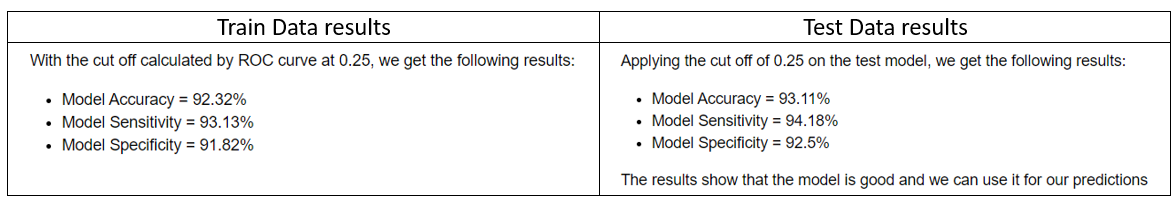

#### We are getting good results on both train and test data so this confirms that the model is stable and is generating good output

#### Customers with a lead score of greater than or equal to 85% can be treated as "Hot Leads" and to be contacted for positive conversion

In [160]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
2,3190,1,0.934544,1,93
4,6974,1,0.995605,1,100
15,3935,1,0.934544,1,93
25,8144,1,0.965895,1,97
29,3249,1,0.995605,1,100
...,...,...,...,...,...
2660,9162,1,0.965895,1,97
2670,1804,1,0.965895,1,97
2675,5093,1,0.995605,1,100
2678,2783,1,0.995605,1,100


#### So we have identified 814 "Hot Leads"

In [161]:
print("Prospect IDs of Hot Leads are as below :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

Prospect IDs of Hot Leads are as below :


array([3190, 6974, 3935, 8144, 3249, 4780, 6843, 7385, 4947, 9184,  700,
       5408, 5836, 7967, 7689, 6197, 9233, 5651, 8539, 7091, 4627, 6265,
       5236, 4872, 1490, 1467,  671,  238, 8625, 2339, 7450, 2358, 2235,
       3711, 3179, 7493, 8270, 6088, 2357, 2032, 2689, 6199, 8899, 7408,
       5932, 1925, 6576, 8038, 4012, 8748, 2512,  784, 4943, 8778, 8229,
       4555, 5190, 1731, 6413, 2010, 4430, 3078, 8343, 3068, 6792, 7911,
       2692, 5212, 8104, 8173, 1829, 1883, 8389, 1857, 6297, 2360, 6480,
       6305, 1158, 6279, 2989, 7099, 5391,  922, 2967,  112, 1955, 7952,
       2199, 1739, 3270, 3151, 4421, 6238, 4531, 5577, 2157, 8711,  572,
       4795, 6741, 3272, 6094, 2856,  676, 4822, 4758,  675, 3570, 7053,
       6739, 6684, 3401, 5436, 6211, 7039, 2208, 3712, 8055, 4935, 3532,
       1928, 1558, 8983, 4569, 3005, 4296, 4734, 7314,   15, 7887, 7116,
       5435, 1026, 8963, 1819,   99, 3601, 4757, 3546, 4784, 2060, 4450,
       6294, 5561, 7910, 8817, 1265, 7231, 8219, 22

#### Let's find out the important features from our final model

In [162]:
res.params.sort_values(ascending=False)

Tags_Lost to EINS                                5.998683
Tags_Closed by Horizzon                          5.778726
Lead_Source_Welingak Website                     2.907543
Tags_Will revert after reading the email         2.764181
Last_Activity_SMS Sent                           2.079268
const                                            0.579417
Tags_Busy                                       -1.201588
Last_Notable_Activity_Olark Chat Conversation   -1.385236
Last_Notable_Activity_Modified                  -1.595284
Choosing_Course_Not Specified                   -2.590123
Tags_Interested in other courses                -3.336039
Tags_Other Tags                                 -4.488011
Tags_Ringing                                    -5.147460
dtype: float64

### Insights:

It can be concluded that the variables that are essential for finding potential buyers are:
- **Last Notable Activity:** When leads modify their applications, it shows their interest in buying the courses.
- **Lead Origin:** Leads generated from Lead Add Form has higher conversion rate.
- **Tags:** Leads that revert after the email are bound to be potential buyers.
- **Current Occupation:** Leads who are working professionals or unemployed are proven to be potential buyers.
- **Lead Source:** Leads from Welingak Website, Olark Chat, Reference, Google, and Direct Traffic needs to be targeted on priority. 